Text(0, 0.5, 'S(t)')

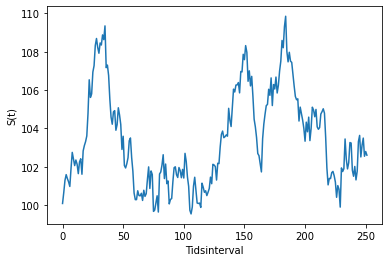

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(142)


def geo_paths(S,T,t,r,sigma,steps,N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = (T-t)/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 105 # strike
T = 1 # time to maturity
t = 0
r = 0.00 # risk free risk in annual %
mu = 0.0
sigma = 0.1 # annual volatility in %

steps = 252*1 # time steps
N = 1 # number of trials ("Antal aktier")

paths = geo_paths(S,T,t,r,sigma,steps,N)
    

plt.plot(paths);
plt.xlabel("Tidsinterval")
plt.ylabel("S(t)")

In [3]:
mylist1 = []
for i in range(0,252):
    if paths[i] > K:
        value = paths[i]-K
        mylist1.append(value)
    else:
        value0 = paths[i] - paths[i]
        mylist1.append(value0)
array1 = np.stack(mylist1[:])

In [4]:
mylist2 = []
for i in range(0,251):
    if (((paths[i+1])<K) and (paths[i] > K)):
        value = (paths[i+1])-K
        mylist2.append(value)
    else:
        value0 = paths[i] - paths[i]
        mylist2.append(value0)
mylist2.append(mylist1[251])
array2 = np.stack((mylist2[:]))

In [5]:
mylist3 = []
for i in range(0,252):
    if (((paths[i-1])<K) and (paths[i] > K)):
        value = (paths[i])-K
        mylist3.append(value)
    else:
        value0 = paths[i] - paths[i]
        mylist3.append(value0)
array3 = np.stack(mylist3[:])            

In [6]:
købs_pris = np.where(array3 > 0)
salgs_pris = np.where(array2 < 0)
list_of_punkter = salgs_pris[0]
new_array = np.cumsum(array2[salgs_pris]-array3[købs_pris])

In [7]:
array_zeros = np.zeros(252)
new_lst = [[i] for i in array_zeros]
array_of_zeros = np.stack(new_lst[:])

In [8]:
mylist4 = []
j = 0
for i in range (0,252):
    if i == list_of_punkter[j]:
        array_of_zeros[i] = new_array[j]
        mylist4.append(array_of_zeros[i])
        if j < len(list_of_punkter)-1:
            j = j+1
    else:
        array_of_zeros[i] = array_of_zeros[i] + array_of_zeros[i-1]
        new_value = array_of_zeros[i]
        mylist4.append(new_value)
array4 = np.stack((mylist4[:]))

In [9]:
final_array = np.subtract(array1, np.negative(array4)) 

Text(0, 0.5, 'V')

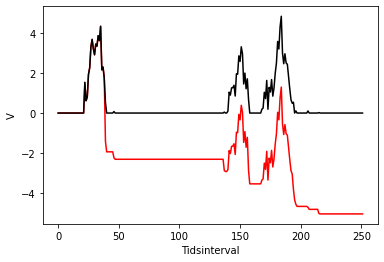

In [10]:
plt.plot(final_array, 'red')
plt.plot(array1, 'Black')
plt.xlabel("Tidsinterval")
plt.ylabel("V")